In [1]:
import sys,os
sys.path.append(os.path.abspath('../'))
from modules import tomographic_doppler as tmd
%pylab notebook
import collections
from modules import auto_doppler_cov as adc
from modules import cross_doppler_cov as cdc

Populating the interactive namespace from numpy and matplotlib


In [20]:
beta=1.23e-3

In [13]:
fct=tmd.ska_spectroscopic_doppler_forecast()
fct.init_camb(lmax=2048,limber_phi_lmin=300)
fct.setup_window_functions(normalize=False,nzbin=3,z_olap=0.0,taper_width=0.05)

fct1=tmd.ska_spectroscopic_doppler_forecast()
fct1.init_camb(lmax=2048,limber_phi_lmin=300)
fct1.setup_window_functions(normalize=False,nzbin=5,z_olap=0.0,taper_width=0.05)
# fct.setup_radial_res()

<IPython.core.display.Javascript object>


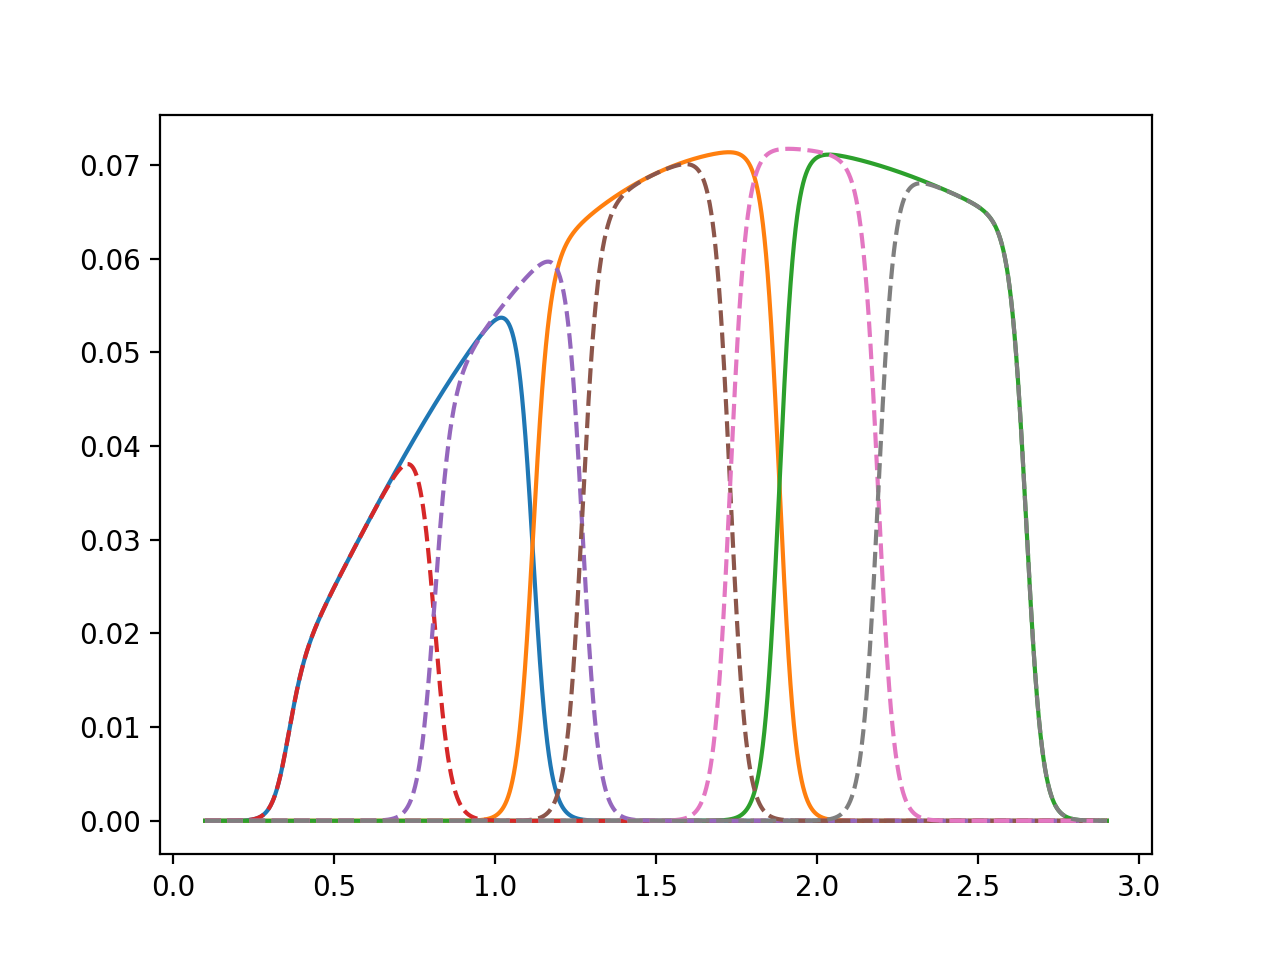

<IPython.core.display.Javascript object>


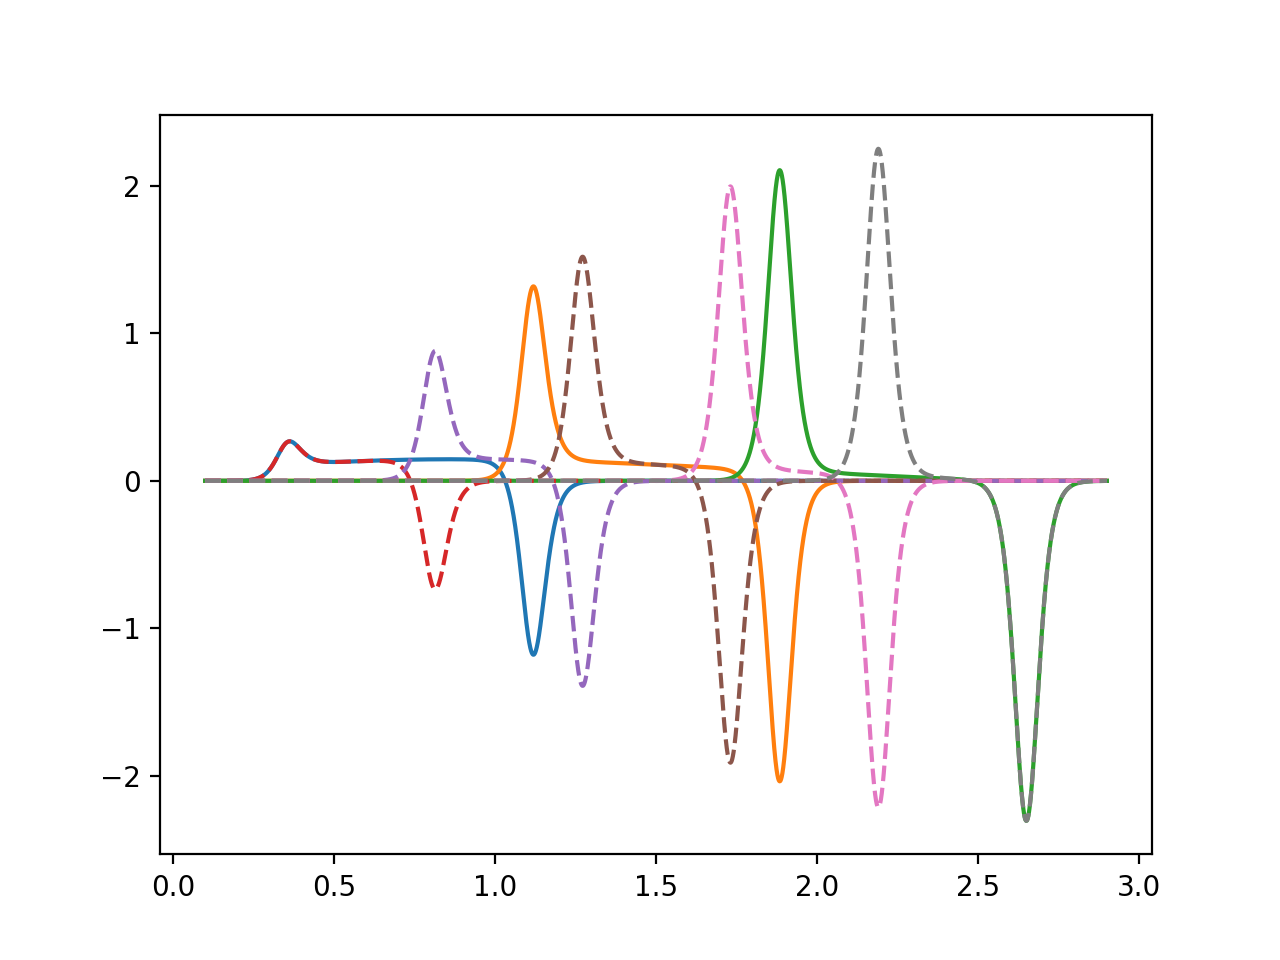

In [16]:
figure()
for zp in fct.z_centroid:
    plot(fct.z,fct.window[zp])
for zp in fct1.z_centroid:
    plot(fct1.z,fct1.window[zp],"--")
    
figure()
for zp in fct.z_centroid:
    plot(fct.z,fct.dwindow[zp])
for zp in fct1.z_centroid:
    plot(fct1.z,fct1.dwindow[zp],"--")
    
# figure()
# plot(fct.z,fct.total_window)
# plot(fct.z,fct.dndz)

<IPython.core.display.Javascript object>


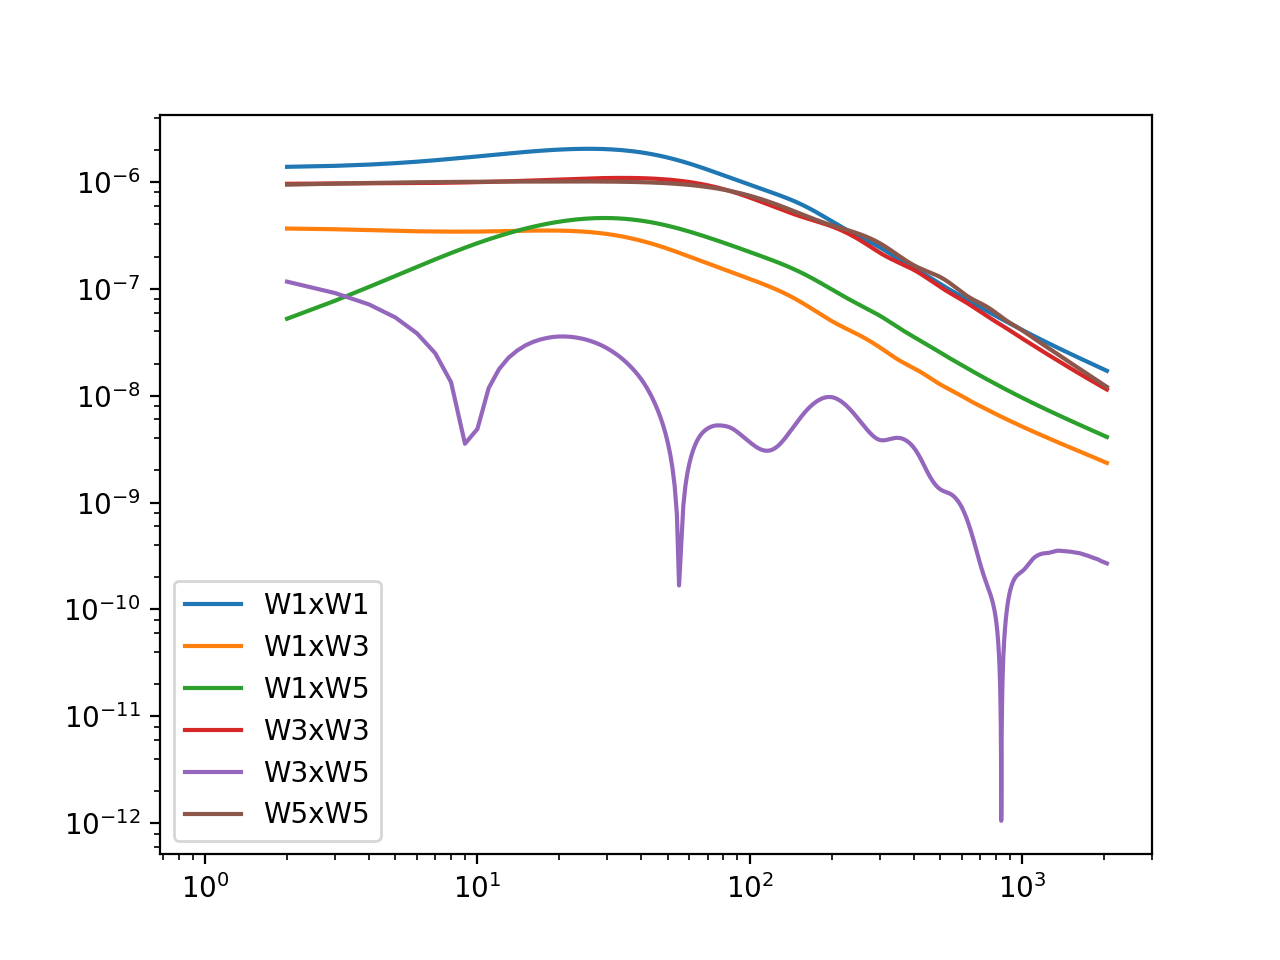

<IPython.core.display.Javascript object>


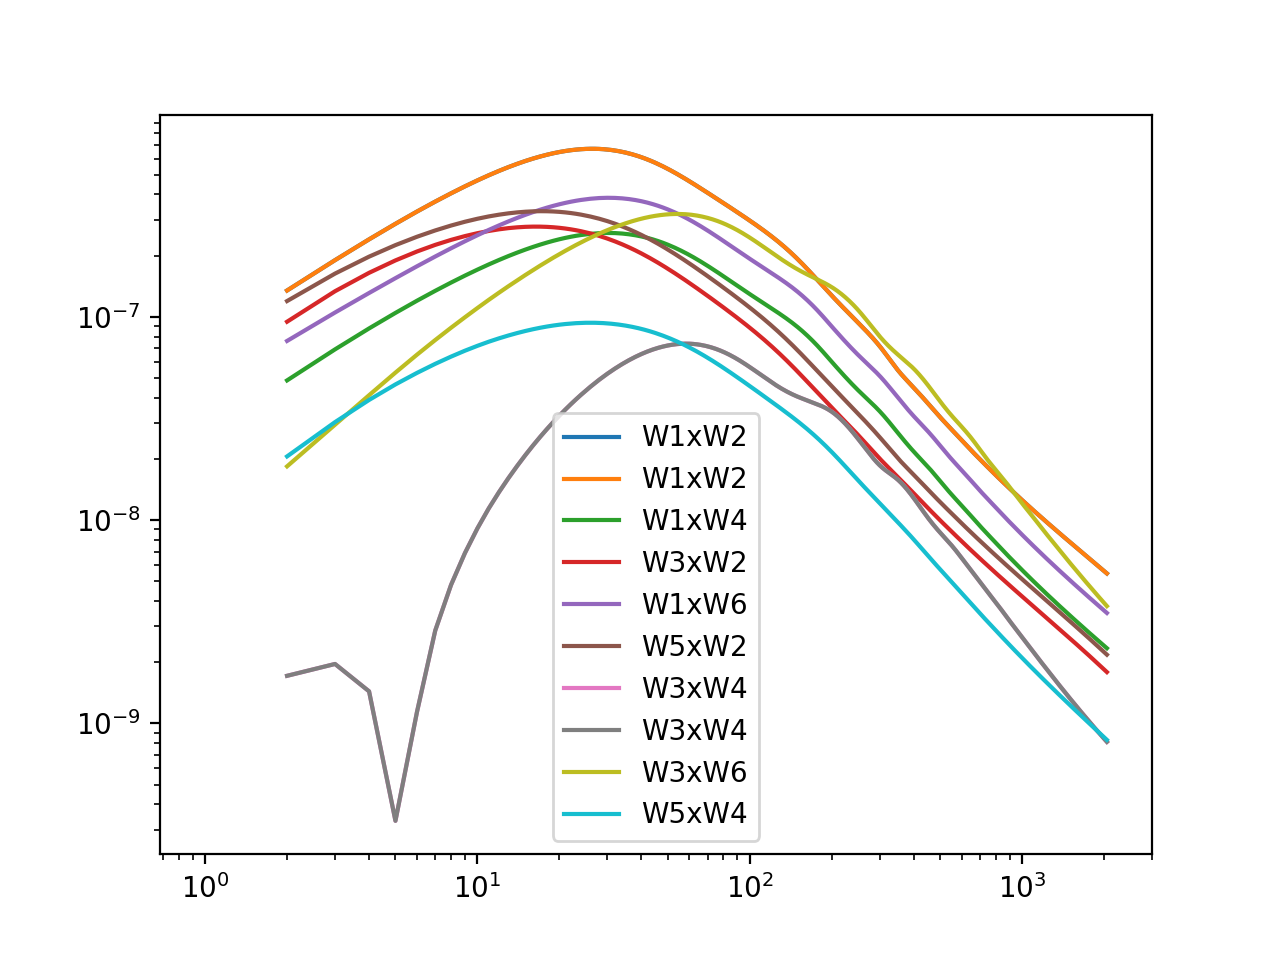

In [17]:
fct.return_spectra()
fct1.return_spectra()

figure()
for key in fct.adr_d1d2.values():
    plot(fct.ell,abs(fct.cls[key]),label=key)
loglog()
legend(loc=0)

figure()
for key in fct.adr_dg.values()[:5]:
    plot(fct.ell,abs(fct.cls[key[0]]),label=key[0])
    plot(fct.ell,abs(fct.cls[key[1]]),label=key[1])
loglog()
legend(loc=0)

<IPython.core.display.Javascript object>


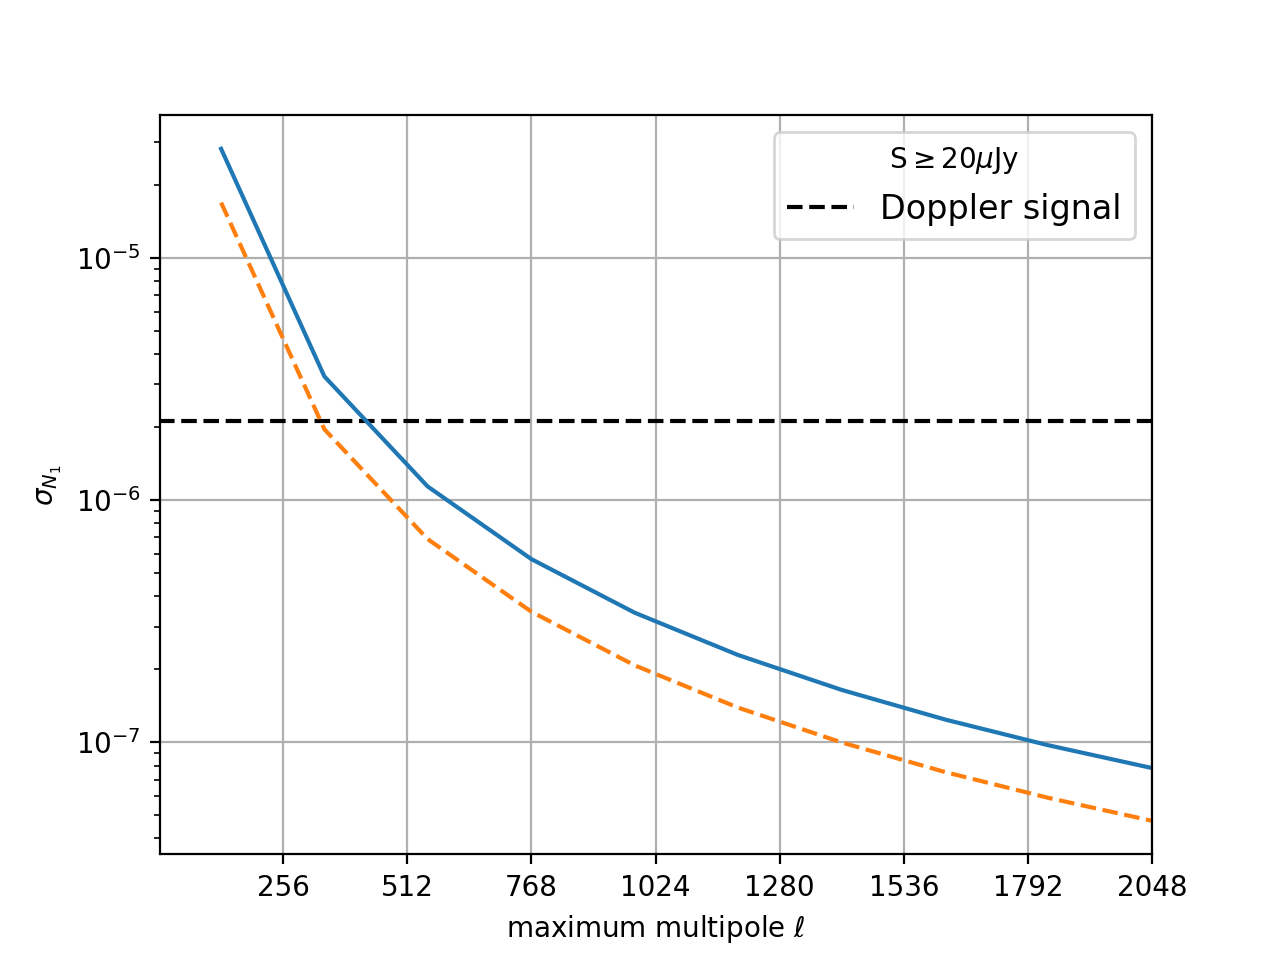

In [23]:
fct.calc_doppler_error()
fct1.calc_doppler_error()

<IPython.core.display.Javascript object>


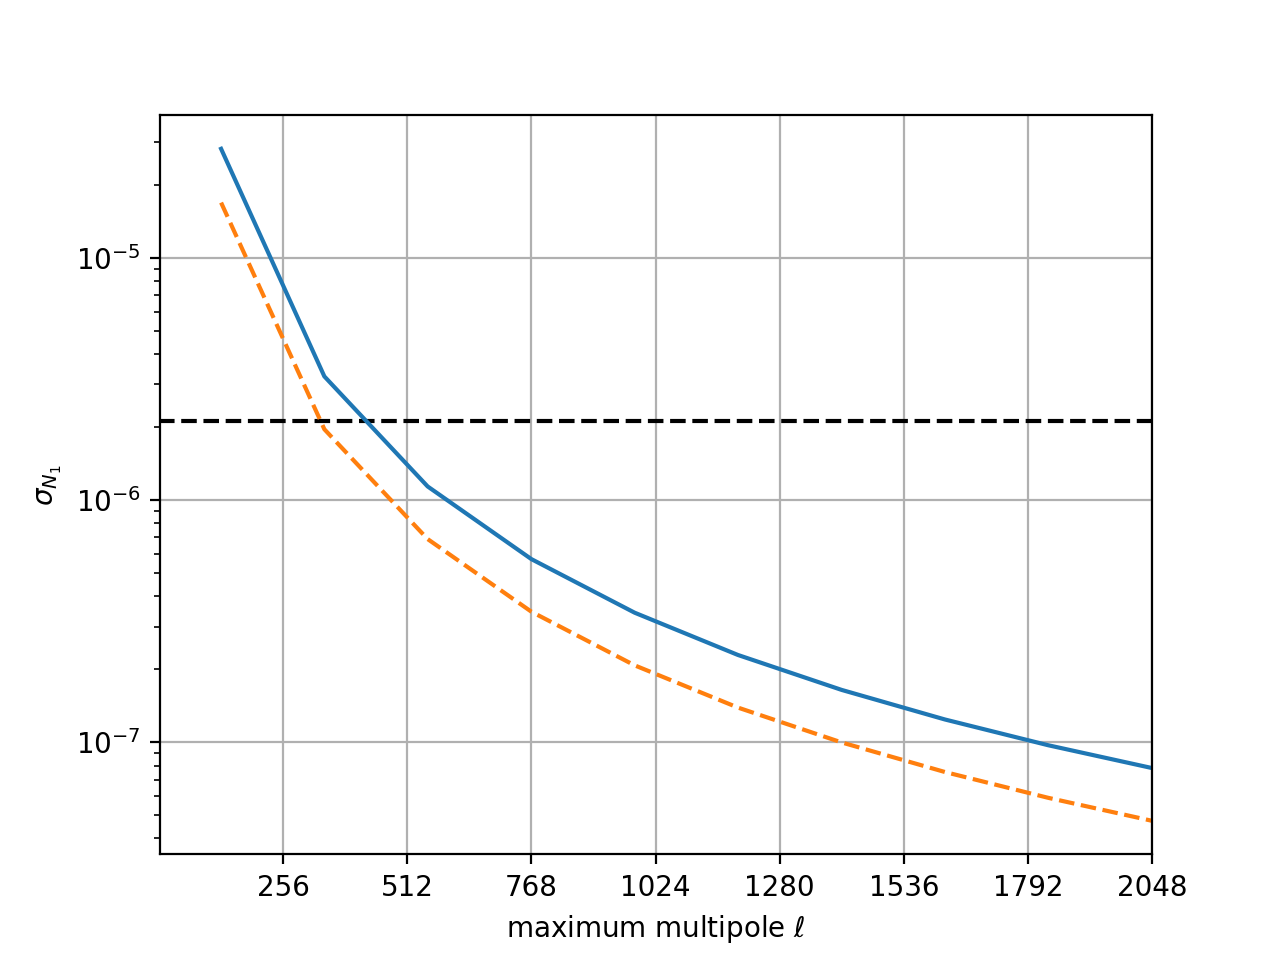

In [24]:
figure()
plot(fct.ell_max,fct.err)
plot(fct1.ell_max,fct1.err,"--")
semilogy()
hlines(pi*(2.*beta/3.)**2.,0,max(fct.ell_max),linestyle="dashed",label=r"Doppler signal")
semilogy() ; grid()
xlim(2,max(fct.ell_max))
xticks([256,512,768,1024,1280,1536,1792,2048],[256,512,768,1024,1280,1536,1792,2048])
xlabel("maximum multipole $\ell$")
ylabel(r"$\sigma_{N_1}$")